# Generate Scaffold

## Introduction to Scaffolds

A scaffold is best defined as a **molecular core** of a compound where R groups are attached via attachment points. Scaffolds are important in drug discovery as they help us uncover structure-activity relationships ([SAR](https://info.collaborativedrug.com/tofu-content-what-is-sar)) and often are found to be essential for the bioactivity of a given class of compounds. The general idea behind this approach is to find relationships between the structure of a compound and its properties such as biological activity and/or physicochemical properties. 

There are multiple ways to define a scaffold and this can make it hard to compare the results of different, independent studies that involve scaffolds.  If you’re interested, you can read more about scaffolding [here](https://datagrok.ai/help/domains/chem/functions/murcko-scaffolds) and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3328312/). Most of the time, we rely on the Murcko scaffold which is also known as the [Bemis-Murcko](https://pubs.acs.org/doi/10.1021/jm9602928) framework. 

From [Chemaxon](https://docs.chemaxon.com/display/docs/bemis-murcko-clustering.md): “Bemis and Murcko outlined a popular method for deriving scaffolds from molecules by removing side chain atoms. A molecular framework can be interpreted as a graph containing nodes and edges representing atom and bond types, respectively. Removing atom and bond labels or agglomerating nodes by chemotype yields a hierarchy of reduced graphs, or molecular equivalence classes, that represent sets of related molecules. Likewise, a framework can be further decomposed into individual rings (or the core ring assembly) using chemically intuitive rules: the rings can individually or jointly be considered as scaffolds derived from the original compound.” 

Scaffolds are generally useful in two main ways: 

1. Identifying core structures that have preferential activity against some specific target classes. This can then serve as a “building block” to further optimize active compounds on certain properties through the modification of R groups that are attached to the scaffold (sometimes referred to as scaffold decorations).
2. Scaffold hopping - finding structurally distinct compounds that have the same activity

Scaffold hopping is particularly useful in [ligand](https://en.wikipedia.org/wiki/Ligand_%28biochemistry%29)-based virtual screening methods where the information of known active compounds is used for hit identification and optimization rather than the available structural data for the target protein. In this approach, you start with a search template (i.e. the scaffold of the known active compound with all the decorations), keep the decorations the same and replace the scaffold itself with a similar molecular structure

Below is an image showing a network of possible scaffolds for a given molecule A: 

![Scaffolds_1.png](./images/Scaffolds_1.png)

If you’re interested in learning more about scaffolds and how we explore scaffolds computationally, read this [paper](https://pubs.acs.org/doi/10.1021/acs.jmedchem.5b01746). 

## Tutorial

So, what does this look like in practice? This tutorial will show you some of the basics of using scaffolds in drug discovery. 

1. Load an example dataset/list of molecules
2. Identify the scaffolds
3. This will then enable you to create a chemical series that can be used in an MMPA (see the [fragmentation](https://www.notion.so/Fragmenting-Compounds-8c861697ae6c44f3991cb215fd93e393) tutorial)
    1. A molecular series refers to a set of two or more molecules with the same scaffold but different R groups at the same position, read more [here](https://pubs.acs.org/doi/10.1021/jm500022q#:~:text=A%20matched%20molecular%20series%20is,groups%20at%20the%20same%20position.). Once a molecular series is generated, it enables scientists to focus on studying molecular properties and how changes in the structure are associated with the changes in these values (e.g. SAR studies).

## RDKit Example

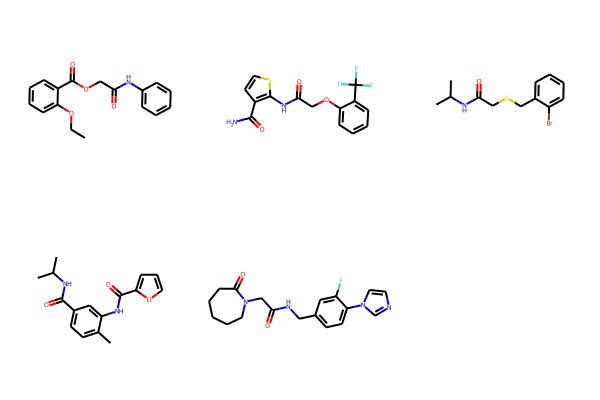

In [1]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Draw import MolsToGridImage

# Load a list of molecules
smiles_list = [
    "CCOC1=CC=CC=C1C(=O)OCC(=O)NC1=CC=CC=C1",
    "NC(=O)C1=C(NC(=O)COC2=CC=CC=C2C(F)(F)F)SC=C1",
    "CC(C)NC(=O)CSCC1=CC=CC=C1Br",
    "CC1=CC=C(C(=O)NC(C)C)C=C1NC(=O)C1=CC=CO1",
    "O=C(CN1CCCCCC1=O)NCC1=CC=C(N2C=CN=C2)C(F)=C1",
]
mol_list = [Chem.MolFromSmiles(smi) for smi in smiles_list]

MolsToGridImage(mol_list)

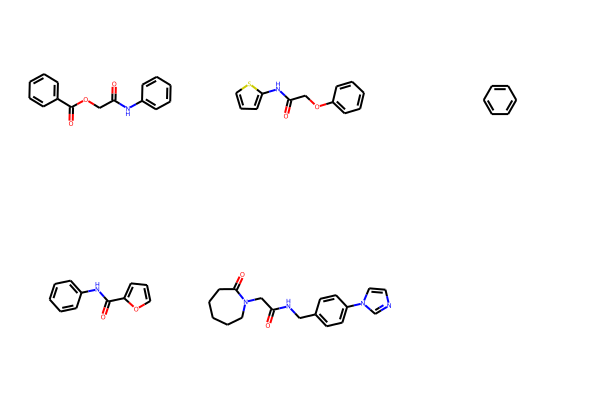

In [2]:
scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mol_list]

MolsToGridImage(scaffolds)

## Datamol Example

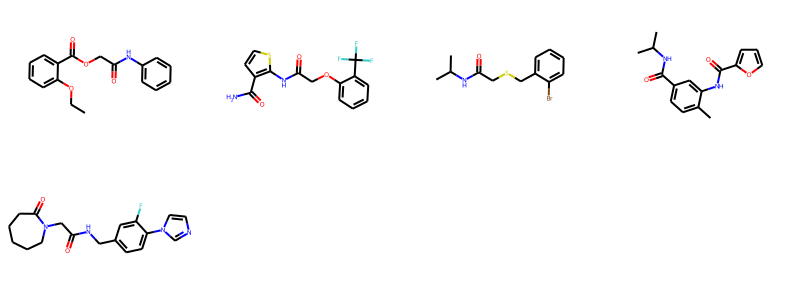

In [3]:
import datamol as dm

# Load a list of molecules
smiles_list = [
    "CCOC1=CC=CC=C1C(=O)OCC(=O)NC1=CC=CC=C1",
    "NC(=O)C1=C(NC(=O)COC2=CC=CC=C2C(F)(F)F)SC=C1",
    "CC(C)NC(=O)CSCC1=CC=CC=C1Br",
    "CC1=CC=C(C(=O)NC(C)C)C=C1NC(=O)C1=CC=CO1",
    "O=C(CN1CCCCCC1=O)NCC1=CC=C(N2C=CN=C2)C(F)=C1",
]
mol_list = [dm.to_mol(smi) for smi in smiles_list]
dm.to_image(mol_list, mol_size=(200, 150))

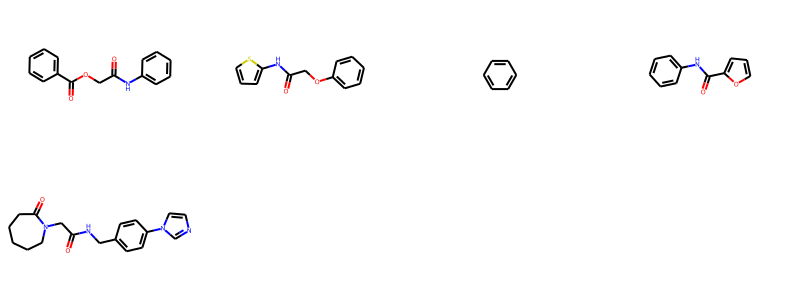

In [4]:
# Extracting Murcko scaffolds from list of compounds
scaffolds = [dm.to_scaffold_murcko(mol) for mol in mol_list]

dm.to_image(scaffolds, mol_size=(200, 150))

## References

- What is SAR? [https://info.collaborativedrug.com/tofu-content-what-is-sar](https://info.collaborativedrug.com/tofu-content-what-is-sar)
- [https://datagrok.ai/help/domains/chem/functions/murcko-scaffolds](https://datagrok.ai/help/domains/chem/functions/murcko-scaffolds)
- [http://practicalcheminformatics.blogspot.com/2021/10/exploratory-data-analysis-with.html](http://practicalcheminformatics.blogspot.com/2021/10/exploratory-data-analysis-with.html)